<a href="https://colab.research.google.com/github/LuisGDP1711/PDSeI_Deteccion_Peso_Cuyes/blob/main/PROYECTO/Colab_NoteBooks/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation


Montar Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importar librerias

In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

Cargar o crear los nuevos archivos

In [ ]:
# Paths de las carpetas
train_folder = '/content/drive/MyDrive/IMAG_CUYES/train'
rot_train_folder = '/content/drive/MyDrive/IMAG_CUYES/AUGMENTATION/ROT_TRAIN'
blur_train_folder = '/content/drive/MyDrive/IMAG_CUYES/AUGMENTATION/BLUR_TRAIN'

# Archivos de pesos
weights_file = '/content/drive/MyDrive/IMAG_CUYES/weights_train.txt'
rot_weights_file = '/content/drive/MyDrive/IMAG_CUYES/AUGMENTATION/ROT_weights_train.txt'
blur_weights_file = '/content/drive/MyDrive/IMAG_CUYES/AUGMENTATION/BLUR_weights_train.txt'

# Crear carpetas si no existen
os.makedirs(rot_train_folder, exist_ok=True)
os.makedirs(blur_train_folder, exist_ok=True)

# Crear archivos txt si no existen
with open(rot_weights_file, 'w') as file:
    pass
with open(blur_weights_file, 'w') as file:
    pass

Pruebas

In [ ]:
# Especificar la ruta y nombre del archivo
file_path = "/content/drive/MyDrive/IMAG_CUYES/AUGMENTATION/asdf.txt"

# Crear el archivo y escribir en él
with open(file_path, 'w') as file:
    pass

# Comprobar si el archivo se creó correctamente
if os.path.exists(file_path):
    print(f"Archivo '{file_path}' creado exitosamente.")
else:
    print("Hubo un error al crear el archivo.")

Archivo '/content/drive/MyDrive/IMAG_CUYES/AUGMENTATION/asdf.txt' creado exitosamente.


Leer el archivo de peso original

In [ ]:
# Leer archivo de pesos original
with open(weights_file, 'r') as wf:
    weights_data = wf.readlines()

In [ ]:
# Iterar y mostrar cada línea
for line in weights_data:
    print(line.strip())  # strip() elimina saltos de línea y espacios en blanco

B_CUY_01_010_11.jpg,553.38224
B_CUY_01_097_09.jpg,521.6308
B_CUY_01_105_06.jpg,403.69688
CUY_01_059_14.jpg,648.63656
B_CUY_01_032_06.jpg,535.23856
CUY_00_059_03.jpg,1015
CUY_01_073_06.jpg,344.72992
CUY_01_098_12.jpg,349.26584
B_CUY_01_036_18.jpg,607.81328
B_CUY_01_084_10.jpg,163.29312
CUY_00_124_02.jpg,1305
CUY_00_072_04.jpg,1340
CUY_01_019_15.jpg,639.56472
B_CUY_01_015_05.jpg,816.4656
B_CUY_01_097_15.jpg,521.6308
CUY_01_038_09.jpg,199.58048
CUY_01_009_08.jpg,353.80176
CUY_01_114_11.jpg,843.68112
CUY_01_011_07.jpg,494.41528
B_CUY_01_100_10.jpg,385.5532
B_CUY_01_061_11.jpg,385.5532
CUY_00_057_03.jpg,1424
CUY_01_104_07.jpg,317.5144
CUY_00_192_04.jpg,1148
CUY_01_022_08.jpg,671.31616
B_CUY_01_028_09.jpg,712.13944
CUY_01_016_12.jpg,639.56472
B_CUY_01_033_06.jpg,521.6308
B_CUY_01_013_06.jpg,340.194
B_CUY_01_081_05.jpg,145.14944
B_CUY_01_001_02.jpg,308.44256
B_CUY_01_013_04.jpg,340.194
CUY_00_098_03.jpg,1410
CUY_01_099_01.jpg,367.40952
B_CUY_01_031_04.jpg,757.49864
B_CUY_01_100_06.jpg,385.553

## Individual

CUY_01_079_01.jpg
/content/drive/MyDrive/IMAG_CUYES/train
/content/drive/MyDrive/IMAG_CUYES/train/CUY_01_079_01.jpg
(224, 224, 3)
Se pudo leer la imagen CUY_01_079_01.jpg.
Se pudo leer la imagen B_CUY_01_001_01.jpg.


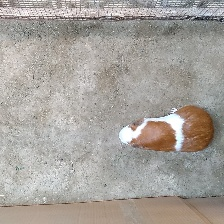

In [ ]:
for line in weights_data:
  img_name, weight = line.strip().split(',')
print(img_name)
print(train_folder)

img_name1 = 'B_CUY_01_001_01.jpg'
train_folder1 = '/content/drive/MyDrive/IMAG_CUYES/train'

img_path = os.path.join(train_folder, img_name)
img_path1 = os.path.join(train_folder1, img_name1)
print(img_path)
# Leer imagen con OpenCV
img = cv2.imread(img_path)
print(img.shape)

if img is None:
    print(f"No se pudo leer la imagen {img_name}.")
else:
    print(f"Se pudo leer la imagen {img_name}.")


img1 = cv2.imread(img_path1)

if img1 is None:
    print(f"No se pudo leer la imagen {img_name1}.")
else:
    print(f"Se pudo leer la imagen {img_name1}.")

cv2_imshow(img)  # Utiliza cv2.imshow si estás en un entorno local.
cv2.waitKey(0)   # Espera a que se presione una tecla
cv2.destroyAllWindows()  # Cierra todas las ventanas de OpenCV en local

(224, 224, 3)


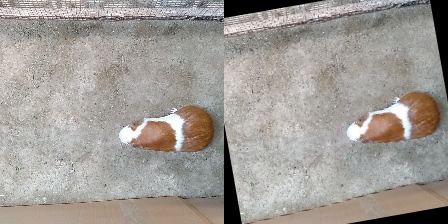

In [ ]:
# Dimensiones de la imagen original
h, w = img.shape[:2]
center = (w // 2, h // 2)

# Matriz de rotación
angle = 10
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
# Aplicar la rotación
rotated_img = cv2.warpAffine(img, rotation_matrix, (w, h))
print(rotated_img.shape)

# Combinar las imágenes horizontalmente en un solo lienzo
combined = np.hstack((img, rotated_img))  # np.vstack para apilar verticalmente

# Mostrar las imágenes combinadas
cv2_imshow(combined)

In [ ]:
rot_img_name = f"ROT_{img_name}"
folder = '/content/drive/MyDrive/PRUEBA'
rot_img_path = os.path.join(folder, rot_img_name)
print(rot_img_path)

/content/drive/MyDrive/PRUEBA/ROT_CUY_01_079_01.jpg


In [ ]:
# Subir la imagen a la carpeta
cv2.imwrite(rot_img_path, rotated_img)

True

In [ ]:
# Registrar en el archivo de pesos de ROT_TRAIN
rot_weights_txt = '/content/drive/MyDrive/PRUEBA/test.txt'
# Crear archivos txt si no existen
with open(rot_weights_txt, 'w') as file:
    pass

with open(rot_weights_txt, 'a') as rot_wf:
  rot_wf.write(f"{rot_img_name},{weight}\n")

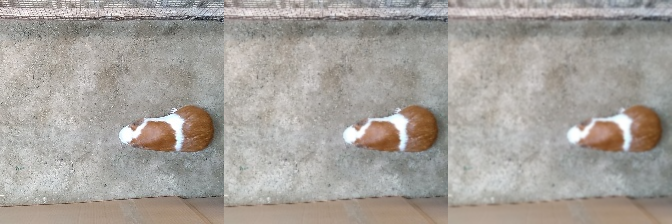

In [ ]:
# Aplicar efecto blur (GaussianBlur)
blurred_img1 = cv2.GaussianBlur(img, (7, 7), 0.6) # Kernel 5x5 y sigma=1 para desenfoque suave
blurred_img2 = cv2.GaussianBlur(img, (7, 7), 1)

# Mostrar
# Combinar las imágenes horizontalmente en un solo lienzo
combined = np.hstack((img,blurred_img1, blurred_img2))  # np.vstack para apilar verticalmente

# Mostrar las imágenes combinadas
cv2_imshow(combined)


## Iterativo

In [ ]:
# Añadir registros a los archivos de pesos para nuevas carpetas
with open(rot_weights_file, 'a') as rot_wf, open(blur_weights_file, 'a') as blur_wf:
    for line in weights_data:
        img_name, weight = line.strip().split(',')
        img_path = os.path.join(train_folder, img_name)
        print(img_path)

        # Leer imagen con OpenCV
        img = cv2.imread(img_path)

        if img is None:
            print(f"No se pudo leer la imagen {img_name}.")
            continue
        else:
            print(f"Se pudo leer la imagen {img_name}.")

        # Rotar la imagen 15 grados
        h, w = img.shape[:2]
        center = (w // 2, h // 2)
        rotation_matrix = cv2.getRotationMatrix2D(center, 15, 1.0)
        rotated_img = cv2.warpAffine(img, rotation_matrix, (w, h))
        # Nombrar cada imagen
        rot_img_name = f"ROT_{img_name}"
        rot_img_path = os.path.join(rot_train_folder, rot_img_name)
        cv2.imwrite(rot_img_path, rotated_img)

        # Registrar en el archivo de pesos de ROT_TRAIN
        rot_wf.write(f"{rot_img_name},{weight}\n")

        # Aplicar efecto blur (GaussianBlur)
        blurred_img = cv2.GaussianBlur(img, (5, 5), 1)  # Kernel 5x5 y sigma=1 para desenfoque suave
        blur_img_name = f"BLUR_{img_name}"
        blur_img_path = os.path.join(blur_train_folder, blur_img_name)
        cv2.imwrite(blur_img_path, blurred_img)

        # Registrar en el archivo de pesos de BLUR_TRAIN
        blur_wf.write(f"{blur_img_name},{weight}\n")

print("Proceso completado.")

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Se pudo leer la imagen CUY_01_085_02.jpg.
/content/drive/MyDrive/IMAG_CUYES/train/B_CUY_01_046_12.jpg
Se pudo leer la imagen B_CUY_01_046_12.jpg.
/content/drive/MyDrive/IMAG_CUYES/train/CUY_00_120_05.jpg
Se pudo leer la imagen CUY_00_120_05.jpg.
/content/drive/MyDrive/IMAG_CUYES/train/CUY_00_108_08.jpg
Se pudo leer la imagen CUY_00_108_08.jpg.
/content/drive/MyDrive/IMAG_CUYES/train/B_CUY_01_003_01.jpg
Se pudo leer la imagen B_CUY_01_003_01.jpg.
/content/drive/MyDrive/IMAG_CUYES/train/CUY_00_088_03.jpg
Se pudo leer la imagen CUY_00_088_03.jpg.
/content/drive/MyDrive/IMAG_CUYES/train/CUY_00_135_03.jpg
Se pudo leer la imagen CUY_00_135_03.jpg.
/content/drive/MyDrive/IMAG_CUYES/train/CUY_01_068_07.jpg
Se pudo leer la imagen CUY_01_068_07.jpg.
/content/drive/MyDrive/IMAG_CUYES/train/B_CUY_01_016_14.jpg
Se pudo leer la imagen B_CUY_01_016_14.jpg.
/content/drive/MyDrive/IMAG_CUYES/train/CUY_00_176_02.jpg
Se pudo leer la image

In [ ]:
#os.listdir('/content/drive/MyDrive/IMAG_CUYES/train/')

Para el caso de efecto Blur


In [ ]:
# Añadir registros a los archivos de pesos para nuevas carpetas
with open(blur_weights_file, 'a') as blur_wf:
    for line in weights_data:
        img_name, weight = line.strip().split(',')
        img_path = os.path.join(train_folder, img_name)
        #print(img_path)

        # Leer imagen con OpenCV
        img = cv2.imread(img_path)

        if img is None:
            print(f"No se pudo leer la imagen {img_name}.")
            continue
        else:
            print(f"Se pudo leer la imagen {img_name}.")

        # Aplicar efecto blur (GaussianBlur)
        blurred_img = cv2.GaussianBlur(img, (7, 7), 0.5)  # Kernel 5x5 y sigma=1 para desenfoque suave
        blur_img_name = f"BLUR_{img_name}"
        blur_img_path = os.path.join(blur_train_folder, blur_img_name)
        cv2.imwrite(blur_img_path, blurred_img)

        # Registrar en el archivo de pesos de BLUR_TRAIN
        blur_wf.write(f"{blur_img_name},{weight}\n")

print("Proceso completado.")

Se pudo leer la imagen B_CUY_01_010_11.jpg.
Se pudo leer la imagen B_CUY_01_097_09.jpg.
Se pudo leer la imagen B_CUY_01_105_06.jpg.
Se pudo leer la imagen CUY_01_059_14.jpg.
Se pudo leer la imagen B_CUY_01_032_06.jpg.
Se pudo leer la imagen CUY_00_059_03.jpg.
Se pudo leer la imagen CUY_01_073_06.jpg.
Se pudo leer la imagen CUY_01_098_12.jpg.
Se pudo leer la imagen B_CUY_01_036_18.jpg.
Se pudo leer la imagen B_CUY_01_084_10.jpg.
Se pudo leer la imagen CUY_00_124_02.jpg.
Se pudo leer la imagen CUY_00_072_04.jpg.
Se pudo leer la imagen CUY_01_019_15.jpg.
Se pudo leer la imagen B_CUY_01_015_05.jpg.
Se pudo leer la imagen B_CUY_01_097_15.jpg.
Se pudo leer la imagen CUY_01_038_09.jpg.
Se pudo leer la imagen CUY_01_009_08.jpg.
Se pudo leer la imagen CUY_01_114_11.jpg.
Se pudo leer la imagen CUY_01_011_07.jpg.
Se pudo leer la imagen B_CUY_01_100_10.jpg.
Se pudo leer la imagen B_CUY_01_061_11.jpg.
Se pudo leer la imagen CUY_00_057_03.jpg.
Se pudo leer la imagen CUY_01_104_07.jpg.
Se pudo leer l